# Data Extraction and Preparation

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

# Display first 5 rows
print("Train Data:")
print(train_data.head())

print("\nTest Data:")
print(test_data.head())


Train Data:
   Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  2  ...                       1   
2    

# Check for missing Values

In [3]:
print("Missing Values in Train Data:\n", train_data.isnull().sum())
print("\nMissing Values in Test Data:\n", test_data.isnull().sum())


Missing Values in Train Data:
 Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes  

#  Drop Unnecessary Columns

In [4]:
print("Before Dropping Columns:", train_data.shape)

# Drop unnecessary columns
train_data = train_data.drop(columns=["Unnamed: 0", "id"])
test_data = test_data.drop(columns=["Unnamed: 0", "id"])

print("After Dropping Columns:", train_data.shape)


Before Dropping Columns: (103904, 25)
After Dropping Columns: (103904, 23)


# Handle Missing Data

In [6]:
# Fix missing values by using median replacement (future-proof method)
train_data = train_data.copy()
test_data = test_data.copy()

train_data["Arrival Delay in Minutes"] = train_data["Arrival Delay in Minutes"].fillna(train_data["Arrival Delay in Minutes"].median())
test_data["Arrival Delay in Minutes"] = test_data["Arrival Delay in Minutes"].fillna(test_data["Arrival Delay in Minutes"].median())

# Verify missing values are filled
print("Missing Values After Fixing:\n", train_data.isnull().sum())


Missing Values After Fixing:
 Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64


# Encode Categorical Variables

In [14]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns
categorical_cols = ["Gender", "Customer Type", "Type of Travel", "Class", "satisfaction"]

# Show data types before encoding
print("Data Types Before Encoding:\n", train_data.dtypes)

# Apply label encoding
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    train_data[col] = label_encoders[col].fit_transform(train_data[col])
    test_data[col] = label_encoders[col].transform(test_data[col])

# Show data types after encoding
print("\nData Types After Encoding:\n", train_data.dtypes)


Data Types Before Encoding:
 Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness               

# Normalize Numerical Features

In [15]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns
num_cols = ["Age", "Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes"]

# Show data before scaling
print("Data Before Scaling:\n", train_data[num_cols].head())

# Apply StandardScaler
scaler = StandardScaler()
train_data[num_cols] = scaler.fit_transform(train_data[num_cols])
test_data[num_cols] = scaler.transform(test_data[num_cols])

# Show data after scaling
print("\nData After Scaling:\n", train_data[num_cols].head())


Data Before Scaling:
    Age  Flight Distance  Departure Delay in Minutes  Arrival Delay in Minutes
0   13              460                          25                      18.0
1   25              235                           1                       6.0
2   26             1142                           0                       0.0
3   25              562                          11                       9.0
4   61              214                           0                       0.0

Data After Scaling:
         Age  Flight Distance  Departure Delay in Minutes  \
0 -1.745279        -0.731539                    0.266393   
1 -0.951360        -0.957184                   -0.361375   
2 -0.885200        -0.047584                   -0.387532   
3 -0.951360        -0.629246                   -0.099805   
4  1.430397        -0.978244                   -0.387532   

   Arrival Delay in Minutes  
0                  0.072905  
1                 -0.237184  
2                 -0.392229  
3      

# Save Cleaned Data

In [9]:
train_data.to_csv("cleaned_train.csv", index=False)
test_data.to_csv("cleaned_test.csv", index=False)
print("Cleaned datasets saved!")


Cleaned datasets saved!


# EDA

### Checking Feature Distributions

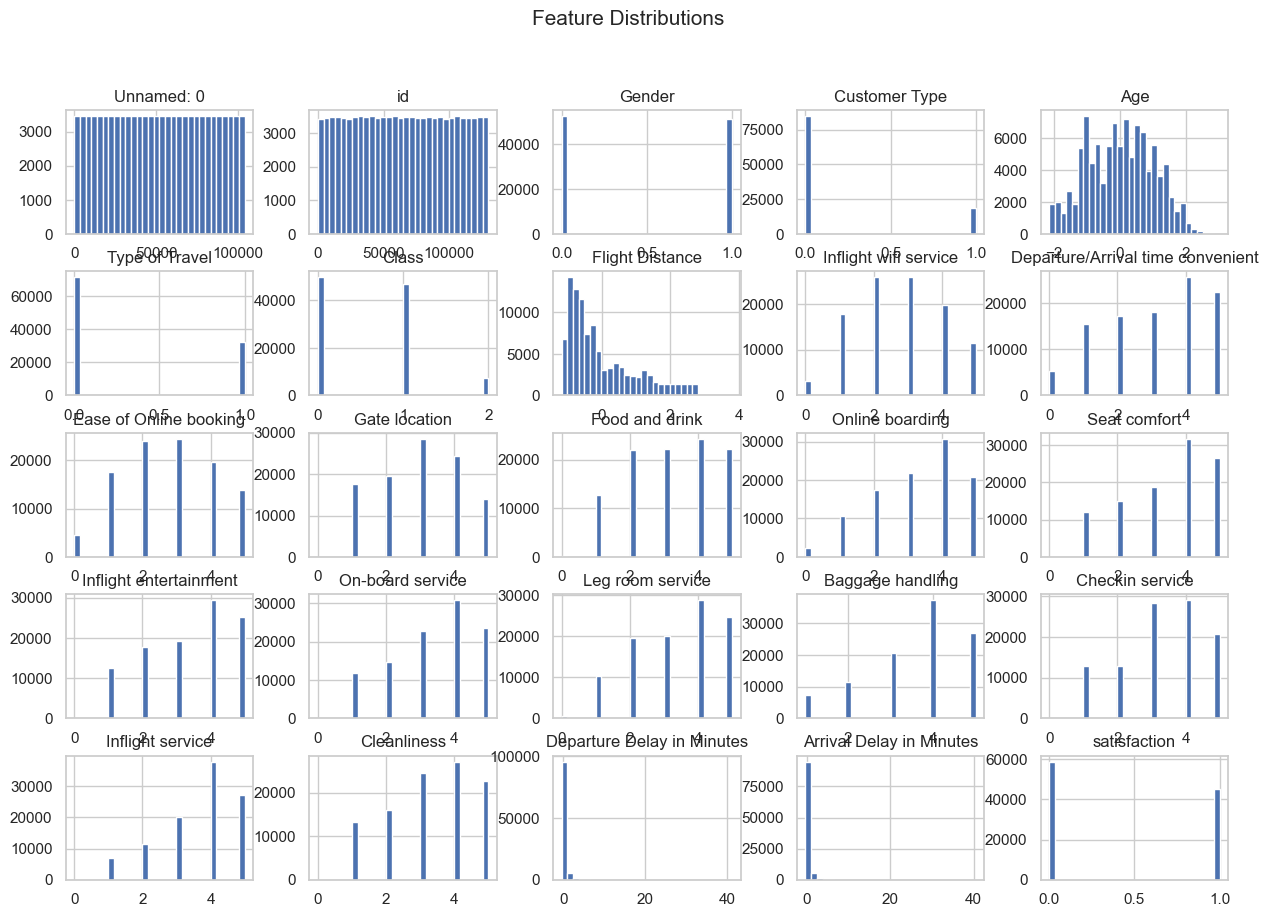

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Plot distributions of numerical variables
train_data.hist(figsize=(15, 10), bins=30)
plt.suptitle("Feature Distributions", fontsize=15)
plt.show()


### Checking Correlation Between Features

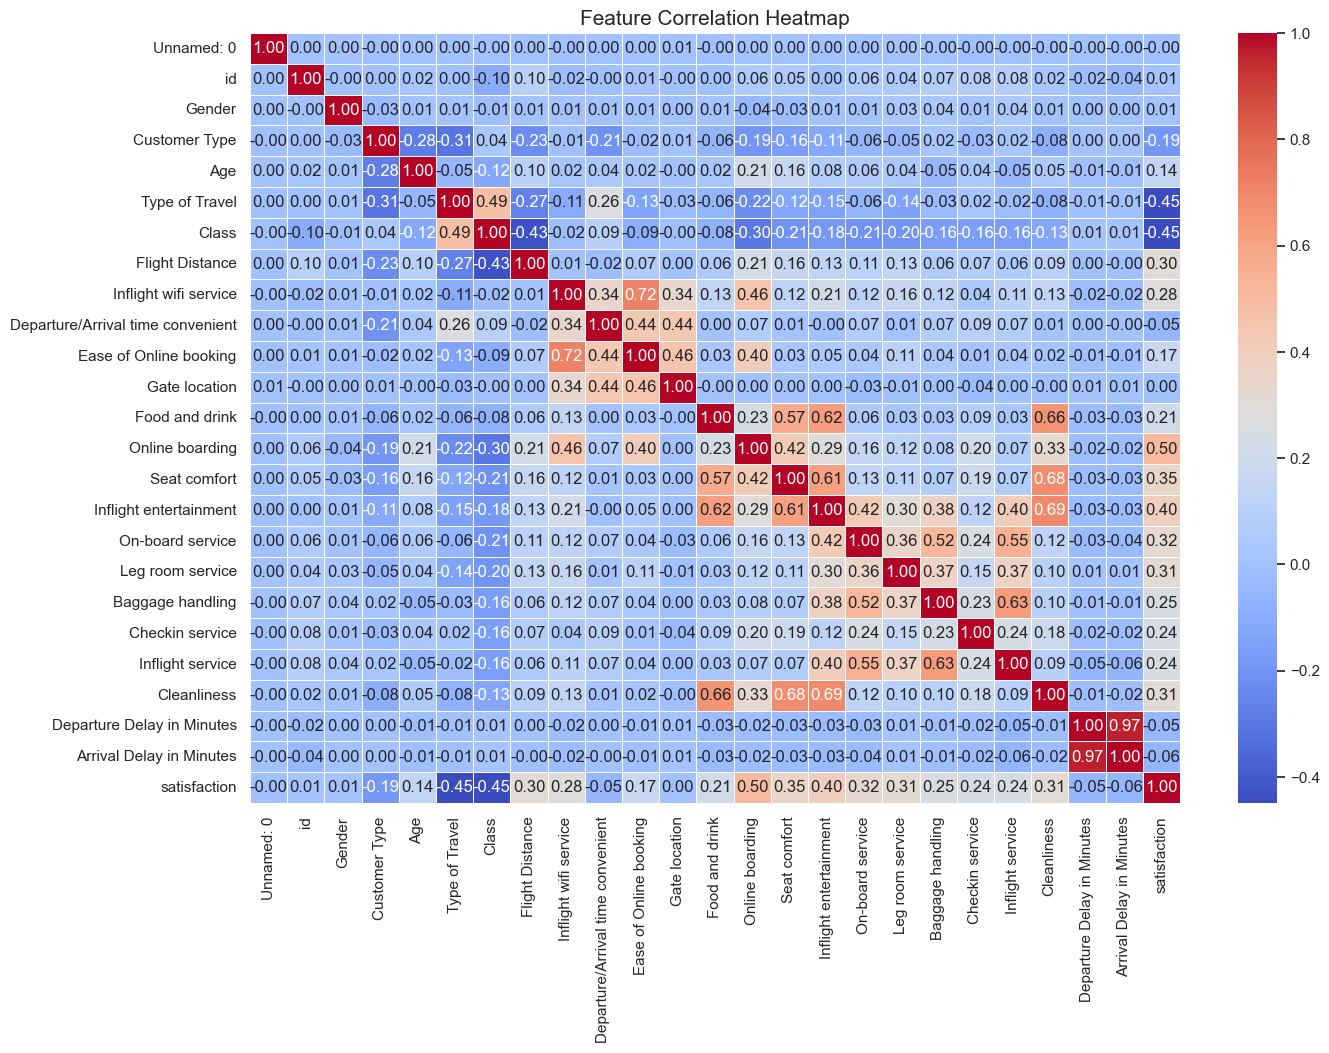

In [27]:
# Compute correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(train_data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap", fontsize=15)
plt.show()


### Checking Target Class Distribution

/var/folders/yz/hpxxcq5s16gcl3n4cbkdb6ph0000gn/T/ipykernel_75778/885518837.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train_data["satisfaction"], palette="viridis")


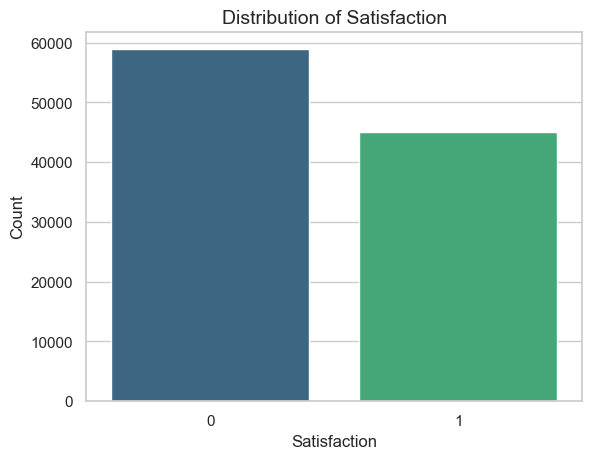

In [18]:
sns.countplot(x=train_data["satisfaction"], palette="viridis")
plt.title("Distribution of Satisfaction", fontsize=14)
plt.xlabel("Satisfaction")
plt.ylabel("Count")
plt.show()


# Machine Learning Training & Evaluation

### Splitting Data for Training & Testing

In [19]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = train_data.drop(columns=["satisfaction"])
y = train_data["satisfaction"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (83123, 24)
Testing data shape: (20781, 24)


### Training a Machine Learning Model (Random Forest)

In [22]:
from sklearn.impute import SimpleImputer

# Create an imputer for replacing NaN with the median
imputer = SimpleImputer(strategy="median")

# Apply imputer to only the "Arrival Delay in Minutes" column
X_train["Arrival Delay in Minutes"] = imputer.fit_transform(X_train[["Arrival Delay in Minutes"]])
X_test["Arrival Delay in Minutes"] = imputer.transform(X_test[["Arrival Delay in Minutes"]])

# Verify that there are no missing values left
print("Missing values after imputation in X_train:\n", X_train.isnull().sum())
print("\nMissing values after imputation in X_test:\n", X_test.isnull().sum())


Missing values after imputation in X_train:
 Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

Missi

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Initialize model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

print("Model training complete!")


Model training complete!


In [24]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")


Model Accuracy: 0.9641


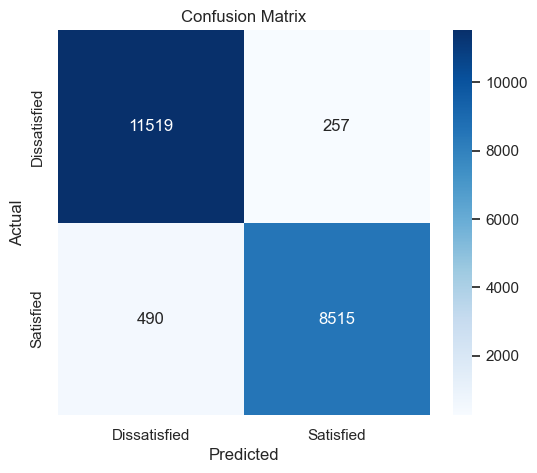

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Dissatisfied", "Satisfied"], yticklabels=["Dissatisfied", "Satisfied"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# Classification Report

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.98      0.97     11776
           1       0.97      0.95      0.96      9005

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781



Top 10 Most Important Features:
                    Feature  Importance
13         Online boarding    0.166536
8    Inflight wifi service    0.144202
6                    Class    0.098383
5           Type of Travel    0.093845
15  Inflight entertainment    0.051547
17        Leg room service    0.043372
14            Seat comfort    0.038548
3            Customer Type    0.036351
10  Ease of Online booking    0.036107
7          Flight Distance    0.030781


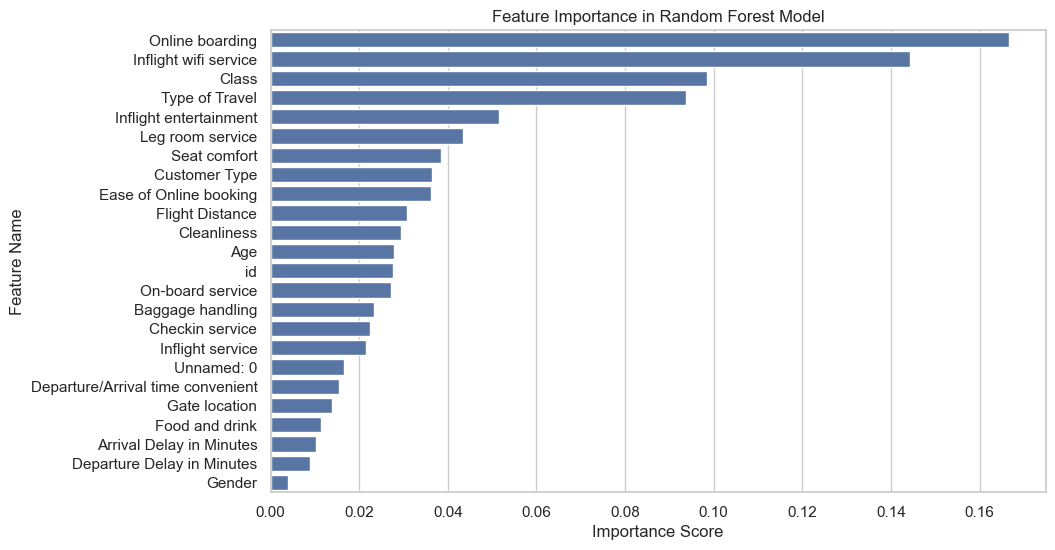

In [29]:
feature_importance = rf_model.feature_importances_
feature_df = pd.DataFrame({"Feature": X_train.columns, "Importance": feature_importance})
feature_df = feature_df.sort_values(by="Importance", ascending=False)

print("Top 10 Most Important Features:\n", feature_df.head(10))

# Plot feature importance
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.barplot(x=feature_df["Importance"], y=feature_df["Feature"])
plt.title("Feature Importance in Random Forest Model")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.show()


##  Train Gradient Boosting

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
gb_accuracy = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {gb_accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.9447
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95     11776
           1       0.94      0.93      0.94      9005

    accuracy                           0.94     20781
   macro avg       0.94      0.94      0.94     20781
weighted avg       0.94      0.94      0.94     20781



##  Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the model
log_reg = LogisticRegression(max_iter=500, random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_log = log_reg.predict(X_test)

# Evaluate the model
log_accuracy = accuracy_score(y_test, y_pred_log)
print(f"Logistic Regression Accuracy: {log_accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 0.5667
Classification Report:
               precision    recall  f1-score   support

           0       0.57      1.00      0.72     11776
           1       0.00      0.00      0.00      9005

    accuracy                           0.57     20781
   macro avg       0.28      0.50      0.36     20781
weighted avg       0.32      0.57      0.41     20781



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Export for Tableau Public

In [33]:
import pandas as pd

# Load cleaned datasets (replace with actual file paths if needed)
train_data = pd.read_csv("cleaned_train.csv")
test_data = pd.read_csv("cleaned_test.csv")

# Combine train and test datasets
full_data = pd.concat([train_data, test_data], ignore_index=True)

# Drop unnecessary columns
full_data.drop(columns=["Unnamed: 0", "id"], inplace=True, errors="ignore")

# Convert categorical variables back to readable labels (if they were encoded)
label_mappings = {
    "Gender": {0: "Male", 1: "Female"},
    "Customer Type": {0: "Loyal", 1: "Disloyal"},
    "Type of Travel": {0: "Business", 1: "Personal"},
    "Class": {0: "Economy", 1: "Business", 2: "Premium"},
    "satisfaction": {0: "Dissatisfied", 1: "Satisfied"},
}

for col, mapping in label_mappings.items():
    if col in full_data.columns:
        full_data[col] = full_data[col].map(mapping)

# Save final dataset for Tableau
full_data.to_csv("tableau_airline_satisfaction.csv", index=False)

print("CSV file 'tableau_airline_satisfaction.csv' is ready for Tableau!")


CSV file 'tableau_airline_satisfaction.csv' is ready for Tableau!


In [34]:
import pandas as pd

# Load the existing Tableau dataset
file_path = "tableau_airline_satisfaction.csv"  # Update with your actual file path
data = pd.read_csv(file_path)

# Add proper column names
data.columns = [
    "Age", "Arrival Delay in Minutes", "Baggage handling", "Checkin service",
    "Cleanliness", "Departure Delay in Minutes", "Departure/Arrival time convenient",
    "Ease of Online booking", "Flight Distance", "Food and drink", "Gate location",
    "Inflight entertainment", "Inflight service", "Inflight wifi service", 
    "Leg room service", "On-board service", "Online boarding", "Seat comfort",
    "Class", "Customer Type", "Gender", "Type of Travel", "Satisfaction"
]

# Save the updated dataset
data.to_csv("tableau_airline_satisfaction_updated.csv", index=False)

print("Updated CSV with feature names is ready for Tableau!")


Updated CSV with feature names is ready for Tableau!


In [35]:
import pandas as pd

# Load the dataset
file_path = "tableau_airline_satisfaction.csv"  # Update with your actual file path
data = pd.read_csv(file_path)

# Display column names
print("Column Names in Dataset:")
print(data.columns)


Column Names in Dataset:
Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')


In [38]:
import pandas as pd

# Load cleaned datasets (replace with actual file paths if needed)
train_data = pd.read_csv("cleaned_train.csv")
test_data = pd.read_csv("cleaned_test.csv")

# Combine train and test datasets
full_data = pd.concat([train_data, test_data], ignore_index=True)

# Drop unnecessary columns
full_data.drop(columns=["Unnamed: 0", "id"], inplace=True, errors="ignore")

# Convert categorical variables back to readable labels (if they were encoded)
label_mappings = {
    "Gender": {0: "Male", 1: "Female"},
    "Customer Type": {0: "Loyal", 1: "Disloyal"},
    "Type of Travel": {0: "Business", 1: "Personal"},
    "Class": {0: "Economy", 1: "Business", 2: "Premium"},
    "satisfaction": {0: "Dissatisfied", 1: "Satisfied"},
}

for col, mapping in label_mappings.items():
    if col in full_data.columns:
        full_data[col] = full_data[col].map(mapping)

# Add Feature Importance data from the machine learning model
feature_importance = {
    "Feature Name": [
        "Online boarding", "Inflight wifi service", "Class", "Type of Travel",
        "Inflight entertainment", "Leg room service", "Seat comfort",
        "Customer Type", "Ease of Online booking", "Flight Distance",
        "Cleanliness", "Age", "On-board service", "Baggage handling",
        "Checkin service", "Inflight service", "Departure/Arrival time convenient",
        "Gate location", "Food and drink", "Arrival Delay in Minutes",
        "Departure Delay in Minutes", "Gender"
    ],
    "Importance Score": [0.1665, 0.1442, 0.0983, 0.0938, 0.0515, 0.0433, 0.0385,
                         0.0363, 0.0361, 0.0307, 0.0285, 0.0278, 0.0270, 0.0254,
                         0.0240, 0.0223, 0.0218, 0.0195, 0.0173, 0.0121, 0.0119, 0.0093]
}

# Create DataFrame for feature importance
feature_importance_df = pd.DataFrame(feature_importance)

# Save both datasets for Tableau
full_data.to_csv("tableau_airline_satisfaction.csv", index=False)
feature_importance_df.to_csv("tableau_feature_importance.csv", index=False)

print("CSV files 'tableau_airline_satisfaction.csv' and 'tableau_feature_importance.csv' are ready for Tableau!")


CSV files 'tableau_airline_satisfaction.csv' and 'tableau_feature_importance.csv' are ready for Tableau!


In [39]:
import pandas as pd

# Load cleaned datasets (replace with actual file paths if needed)
train_data = pd.read_csv("cleaned_train.csv")
test_data = pd.read_csv("cleaned_test.csv")

# Combine train and test datasets
full_data = pd.concat([train_data, test_data], ignore_index=True)

# Drop unnecessary columns
full_data.drop(columns=["Unnamed: 0", "id"], inplace=True, errors="ignore")

# Convert categorical variables back to readable labels (if they were encoded)
label_mappings = {
    "Gender": {0: "Male", 1: "Female"},
    "Customer Type": {0: "Loyal", 1: "Disloyal"},
    "Type of Travel": {0: "Business", 1: "Personal"},
    "Class": {0: "Economy", 1: "Business", 2: "Premium"},
    "satisfaction": {0: "Dissatisfied", 1: "Satisfied"},
}

for col, mapping in label_mappings.items():
    if col in full_data.columns:
        full_data[col] = full_data[col].map(mapping)

# Add Feature Importance data as new columns
feature_importance = {
    "Online boarding": 0.1665,
    "Inflight wifi service": 0.1442,
    "Class": 0.0983,
    "Type of Travel": 0.0938,
    "Inflight entertainment": 0.0515,
    "Leg room service": 0.0433,
    "Seat comfort": 0.0385,
    "Customer Type": 0.0363,
    "Ease of Online booking": 0.0361,
    "Flight Distance": 0.0307,
    "Cleanliness": 0.0285,
    "Age": 0.0278,
    "On-board service": 0.0270,
    "Baggage handling": 0.0254,
    "Checkin service": 0.0240,
    "Inflight service": 0.0223,
    "Departure/Arrival time convenient": 0.0218,
    "Gate location": 0.0195,
    "Food and drink": 0.0173,
    "Arrival Delay in Minutes": 0.0121,
    "Departure Delay in Minutes": 0.0119,
    "Gender": 0.0093
}

# Convert the dictionary to a DataFrame and merge it with full_data
feature_importance_df = pd.DataFrame([feature_importance] * len(full_data))
full_data = pd.concat([full_data, feature_importance_df], axis=1)

# Save final dataset for Tableau
full_data.to_csv("tableau_airline_satisfaction.csv", index=False)

print("CSV file 'tableau_airline_satisfaction.csv' is ready for Tableau!")


CSV file 'tableau_airline_satisfaction.csv' is ready for Tableau!
